In [858]:
import numpy as np
from matplotlib import pyplot as plt

## The Dataset plotted

/var/folders/jz/6xr35sf90dvd23tg801zs_gw0000gn/T/ipykernel_39890/534359730.py:12: DeprecationWarning: This function is deprecated. Please call randint(50, 100 + 1) instead
  outlier_offsets = np.random.random_integers(low=50, high=100, size=(25))
/var/folders/jz/6xr35sf90dvd23tg801zs_gw0000gn/T/ipykernel_39890/534359730.py:16: DeprecationWarning: This function is deprecated. Please call randint(50, 100 + 1) instead
  outlier_offsets = np.random.random_integers(low=50, high=100, size=(25))
/var/folders/jz/6xr35sf90dvd23tg801zs_gw0000gn/T/ipykernel_39890/534359730.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  random_x = np.random.random_integers(low=0, high=99, size=25)
/var/folders/jz/6xr35sf90dvd23tg801zs_gw0000gn/T/ipykernel_39890/534359730.py:21: DeprecationWarning: This function is deprecated. Please call randint(0, 300 + 1) instead
  random_y = np.random.random_integers(low=0, high=300, size=25)


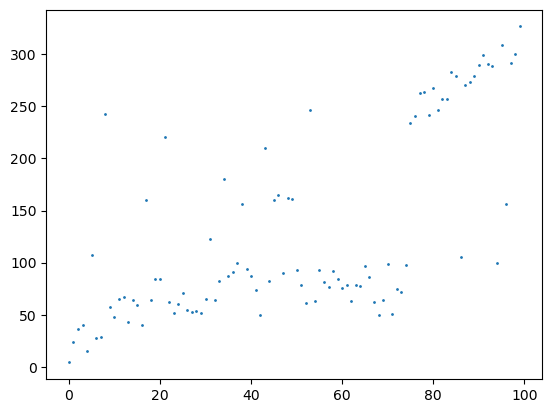

In [859]:
# Create a line as the input dataset
x = np.arange(0, 100)

# y = mx + b
y = 3 * x + 2.5
y_gt = y.copy()

# Add noise
y += np.random.rand(y.shape[0]) * 30

# Add 15 outliers
outlier_offsets = np.random.random_integers(low=50, high=100, size=(25))
y[y.shape[0] // 2:y.shape[0] // 2 + outlier_offsets.shape[0]] = outlier_offsets

# Add 15 outliers
outlier_offsets = np.random.random_integers(low=50, high=100, size=(25))
rand_start = np.random.randint(y.shape[0] // 2)
y[rand_start:rand_start + outlier_offsets.shape[0]] = outlier_offsets

random_x = np.random.random_integers(low=0, high=99, size=25)
random_y = np.random.random_integers(low=0, high=300, size=25)

for index, i in enumerate(random_x):
    y[i] = random_y[index]

# Plot y
plt.scatter(x, y, s=1)
plt.show()

In [860]:
class LinearRegressor:
    def __init__(self):
        self.params = None

    def fit(self, x, y):
        b1 = np.sqrt(np.cov(x, y, bias=True).sum() / np.var(x, ddof=1))
        b0 = np.mean(y) - b1 * np.mean(x)
        self.params = (b0, b1)
    
    def calculate_residuals(self, x, y):
        b, m = self.params
        Y = m * x + b
        residuals = y - Y
        return np.sqrt(residuals**2)

In [861]:
regressor = LinearRegressor()
regressor.fit(x, y)
b, m = regressor.params

In [862]:
print(m)
print(b)
Y = m * x + b

3.839633073061329
-61.697687039103045


## Linear regression plotted with the dataset

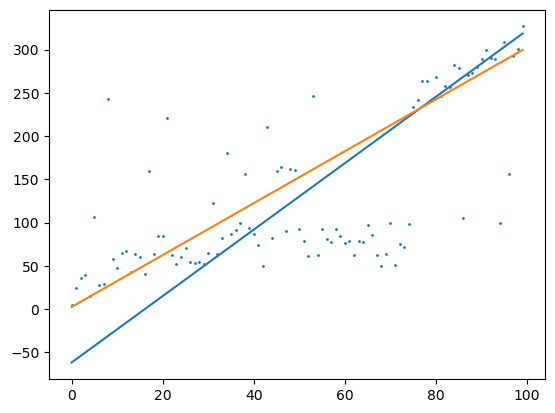

In [863]:
plt.plot(x, Y)
plt.plot(x, y_gt)
plt.scatter(x, y, s=1)

In [864]:
plt.show()


In [865]:
def ransac(regressor, pairs, min_samples, residual_threshold, max_trials):
    i = 0
    max_model = None
    max_inliers = None
    mask_inliers = None

    while i < max_trials:
        
        random_n = np.random.randint(pairs.shape[0], size=min_samples)
        
        x = []
        y = []
        
        for n in random_n:
            x.append(pairs[n][0])
            y.append(pairs[n][1])

        x = np.array(x)
        y = np.array(y)

        regressor.fit(x, y)
        F = regressor.params
        residuals = np.abs(regressor.calculate_residuals(pairs[:, 0], pairs[:, 1]))
        mask = residuals < residual_threshold
        n_inliers = np.count_nonzero(mask)

        if max_inliers is None:
            max_inliers = n_inliers
            max_model = F
            mask_inliers = mask

        if n_inliers > max_inliers:
            max_inliers = n_inliers
            max_model = F
            mask_inliers = mask
            
        i += 1
        
    return max_model, mask_inliers


## Ransac plotted with the dataset

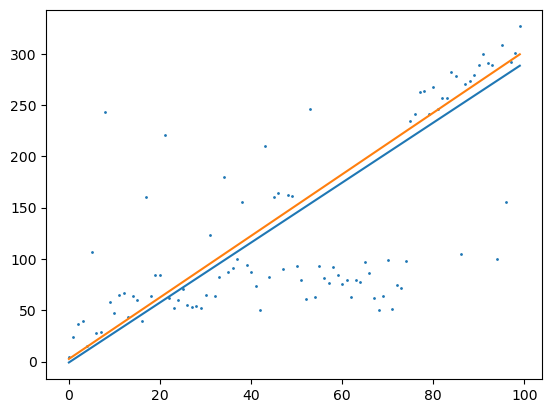

In [866]:

pairs = np.array(list(zip(x, y)))
n_samples = 15
residual_threshold = 40
n_trials = 150
model, mask = ransac(regressor, pairs, n_samples, residual_threshold, n_trials)
b, m = model
Y = m*x + b
plt.plot(x, Y)
plt.plot(x, y_gt)
plt.scatter(x, y, s=1)
plt.show()